<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering with scikit-learn

<br><br></p>


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br><br></p>


In [4]:
data = pd.read_csv('./weather/minute_weather.csv')

In [5]:
data.shape

(1587257, 13)

In [6]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Lots of rows, so let us sample down by taking every 10th row<br><br></p>


In [7]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistics
<br><br></p>


In [8]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Drop all the rows with empty rain_duration and rain_accumulation
<br><br></p>


In [11]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows did we drop ?
<br><br></p>


In [13]:
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Select features we want to use for clustering
<br><br></p>


In [15]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [16]:
select_df = sampled_df[features]

In [17]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Scale the features using StandardScaler
<br><br></p>


In [18]:
X = StandardScaler().fit_transform(select_df)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use KMeans Clustering
<br><br></p>


In [19]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
transformed = model.transform(X)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What are the centers of 12 clusters we formed ?
<br><br></p>


In [20]:
centers = model.cluster_centers_
centers

array([[ 0.2370528 , -0.99849921,  0.65604624, -0.54661221,  0.84512719,
        -0.52929845,  1.16463851],
       [ 1.36654823, -0.08072744, -1.20733159, -0.05127299, -1.07611455,
        -0.03103927, -0.9777088 ],
       [-0.69931794,  0.54004309,  0.17655972, -0.58411397,  0.34587114,
        -0.59752909, -0.11235752],
       [-1.1827737 , -0.86849135,  0.4467553 ,  1.98594294,  0.53806045,
         1.94690409,  0.90654761],
       [ 0.72807983,  0.43635261,  0.28606099, -0.53485791,  0.47376723,
        -0.54102625, -0.76858215],
       [-0.83953983, -1.20026926,  0.37615545,  0.37730224,  0.47470154,
         0.36483892,  1.36117794],
       [-0.21051237,  0.63453584,  0.40866945,  0.73329527,  0.51690005,
         0.67146969, -0.15158659],
       [ 0.06055805, -0.78847487, -1.19713083, -0.57088173, -1.04318487,
        -0.58544948,  0.87878219],
       [ 1.19003044, -0.25464431, -1.1549252 ,  2.12234423, -1.05341978,
         2.23905108, -1.13458324],
       [-0.16425251,  0.8639

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Plots
<br><br></p>


In [21]:
P = utils.pd_centers(features, centers)

# Dry Days

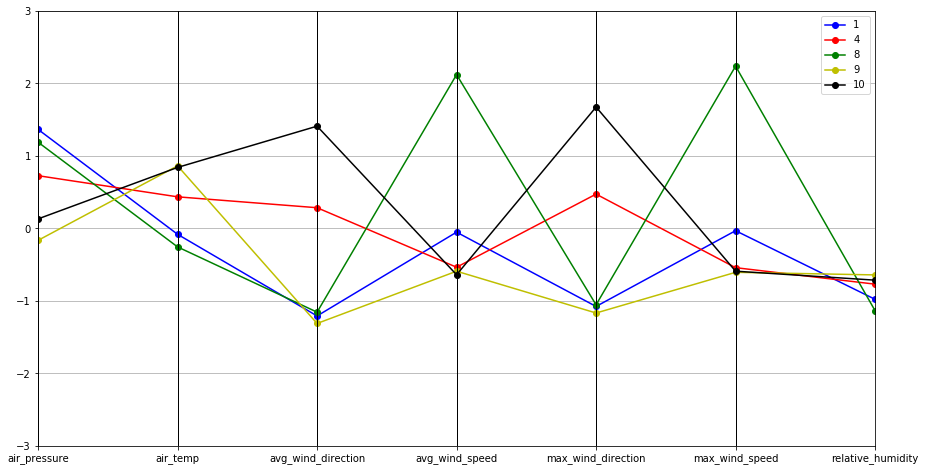

In [22]:
utils.parallel_plot(P[P['relative_humidity'] < -0.5], P)

# Warm Days

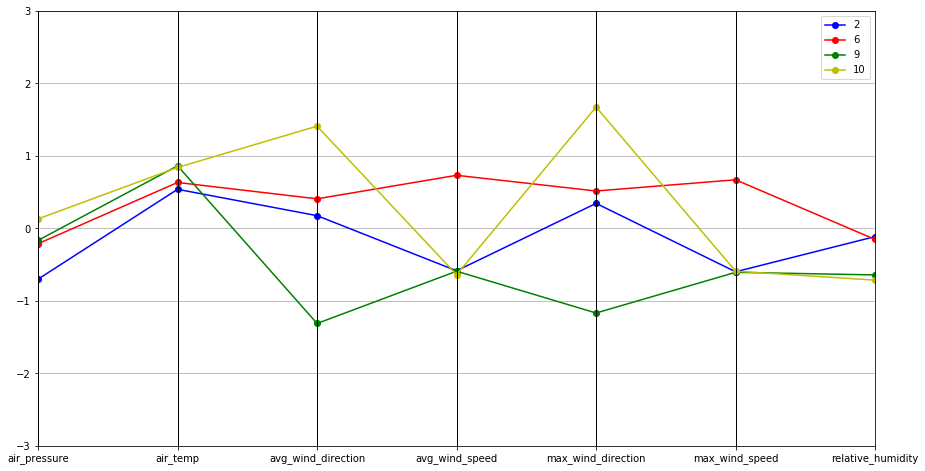

In [23]:
utils.parallel_plot(P[P['air_temp'] > 0.5], P)

# Cool Days

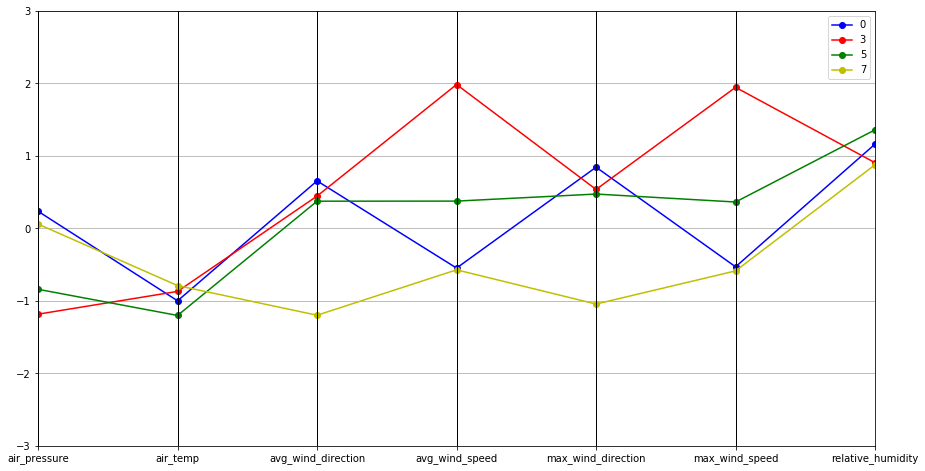

In [24]:
utils.parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)], P)